<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li><li><span><a href="#PFS-association-with-TMB" data-toc-modified-id="PFS-association-with-TMB-5">PFS association with TMB</a></span></li><li><span><a href="#Table-S4" data-toc-modified-id="Table-S4-6">Table S4</a></span></li><li><span><a href="#PFS-association-of-recurrent-alterations" data-toc-modified-id="PFS-association-of-recurrent-alterations-7">PFS association of recurrent alterations</a></span><ul class="toc-item"><li><span><a href="#Table-S5" data-toc-modified-id="Table-S5-7.1">Table S5</a></span></li><li><span><a href="#Table-S6" data-toc-modified-id="Table-S6-7.2">Table S6</a></span></li></ul></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(ggplot2)
library(survival)
library(survminer)
library(Hmisc)
library(forestplot)

Loading required package: ggpubr

Loading required package: lattice

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: grid

Loading required package: magrittr

Loading required package: checkmate



# Functions


In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Manifests/"

# Main

In [5]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

# PFS association with TMB

Only those with fmi data and available TMB score

In [6]:
metadata_f1 <- metadata[!is.na(metadata$TMB_Score),]

In [7]:
head(metadata_f1)

,SAMPLE.ID,sample_id,Patient.ID.x,STUDYID,USUBJID,AGE,AGEU,TRTDUR,COHORT,TTYPE,⋯,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,ALIQUOT,SUBJECT.ID,QC_Status,TMB_Score,TMB_Confidence,PDL1
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>
1,06520001B,06520001B0023R,11010601,GO29664,GO29664-283971-11010601,19,YEARS,1,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,1.481,10.086,11.566,2.101,TRF185855.01,601,PASS,1.75,VALID,No expression
3,06520004C,06520004C0018R,11010201,GO29664,GO29664-283658-11010201,17,YEARS,652,Cohort 2 (HODGKIN LYMPHOMA),HODGKIN LYMPHOMA,⋯,0.656,156.560,157.183,0.791,TRF185857.01,201,QUALIFIED,2.63,LOWER_BOUND,High
4,06520005C,06520005C0017R,11010701,GO29664,GO29664-283971-11010701,11,YEARS,22,Cohort 7 (RHABDOMYOSARCOMA ),RHABDOMYOSARCOMA - ALVEOLAR,⋯,0.696,11.308,11.425,0.427,TRF185858.01,701,QUALIFIED,8.77,VALID,No expression
6,06520007C,06520007C0018R,11010604,GO29664,GO29664-283971-11010604,22,YEARS,65,Cohort 6 (OSTEOSARCOMA),OSTEOSARCOMA,⋯,0.856,30.509,30.552,0.572,TRF185859.01,604,PASS,3.51,VALID,No expression
8,06520010B,06520010B0023R,11011002,GO29664,GO29664-281049-11011002,11,YEARS,20,Cohort 10 (OTHER TUMOR TYPES WITHOUT DOCUMENTED PD-L1 EXPRESSION),OTHER TUMOR TYPES WITHOUT DOCUMENTED PD-L1 EXPRESSION (TUMORS TYPE MUST NOT BE INCLUDED IN LIST ABOVE),⋯,0.318,24.754,24.902,0.451,TRF185860.01,1002,PASS,2.63,VALID,No expression
9,06520011B,06520011B0023R,11010103,GO29664,GO29664-283495-11010103,13,YEARS,1,Cohort 1 (EWING SARCOMA),EWING SARCOMA,⋯,0.239,6.638,6.712,0.316,TRF185861.01,103,PASS,0.88,VALID,No expression


# Table S4

In [8]:
xlsx::write.xlsx(metadata_f1[,c("sample_id", "TMB_Score", "TMB_Confidence")], 
                 file = "~/OneDrive - UHN/Documents/Manuscripts/INDICATE/v2/TableS4.xlsx",row.names = F)

In [9]:
summary(metadata_f1$TMB_Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.750   2.630   3.939   4.825  18.430 

In [10]:
dim(metadata_f1)

[1] 51 77

In [11]:
metadata_f1$tumor_type[metadata_f1$TMB_Score > 10] 

[1] "Metastatic" "Metastatic"

In [12]:
metadata_f1$TMBgroup <- NA
metadata_f1$TMBgroup[metadata_f1$TMB_Score >= 4.825] <- "TMB high"
metadata_f1$TMBgroup[metadata_f1$TMB_Score < 4.825 &
                    metadata_f1$TMB_Score > 1.75] <- "TMB intermediate"
metadata_f1$TMBgroup[metadata_f1$TMB_Score <= 1.750] <- "TMB low"

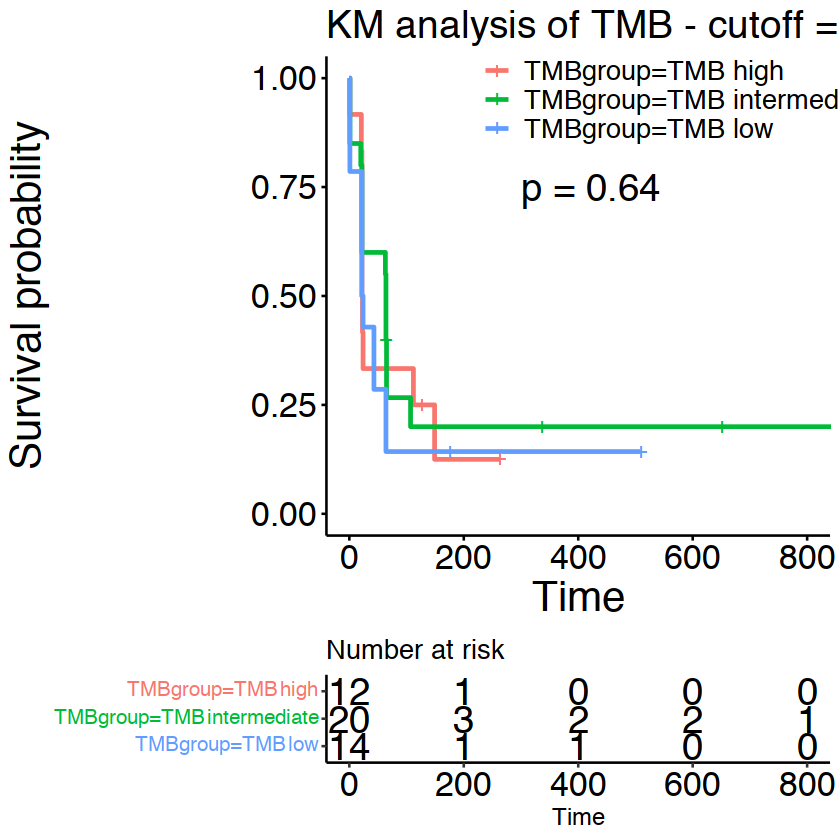

In [13]:
sfit <- survfit(Surv(TRTDUR, progressed)~ TMBgroup, data= metadata_f1)

kmplot <- ggsurvplot(sfit, conf.int=FALSE, #palette = c("blue", "red"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "KM analysis of TMB - cutoff = 5")
kmplot

In [14]:
pdf(file = paste0(plotpath,"KM_TMB_5.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

In [15]:
summary(metadata_f1$TMB_Score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.750   2.630   3.939   4.825  18.430 

In [16]:
metadata_f1$TMBgroup <- NA
metadata_f1$TMBgroup[metadata_f1$TMB_Score >= 2.6] <- "TMB >= median"
metadata_f1$TMBgroup[metadata_f1$TMB_Score < 2.6] <- "TMB < median"

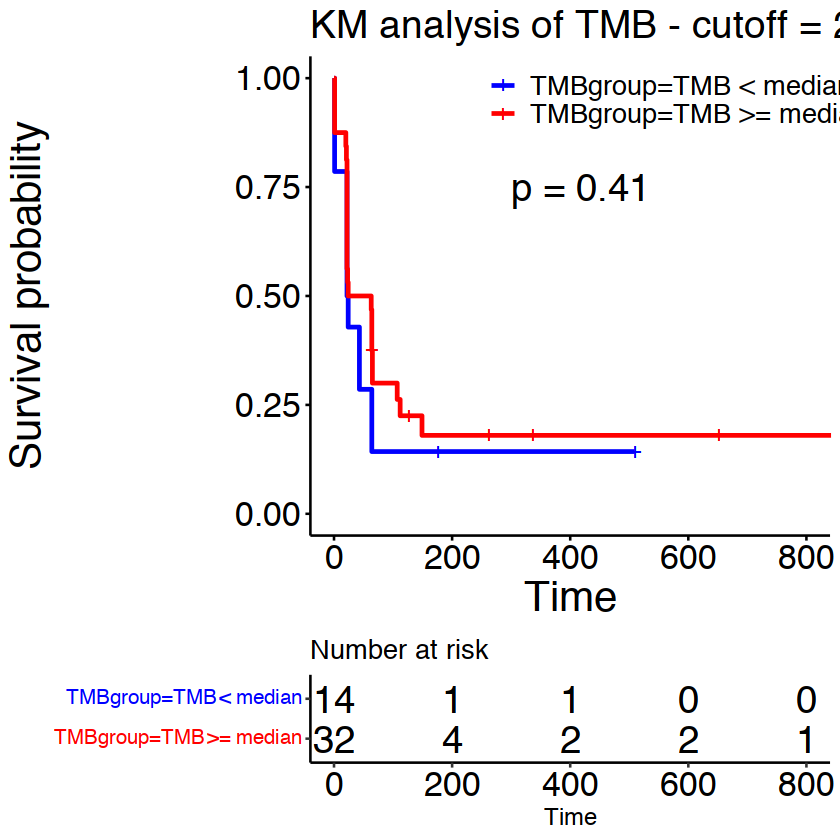

In [17]:
sfit <- survfit(Surv(TRTDUR, progressed)~ TMBgroup, data= metadata_f1)

kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("blue", "red"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "KM analysis of TMB - cutoff = 2.6 (median)")
kmplot

In [18]:
pdf(file = paste0(plotpath,"KM_TMB_median.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

Cox

In [19]:
coxmodel <- coxph(Surv(TRTDUR, progressed)~ TMB_Score + disease_group, data= metadata_f1) 
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ TMB_Score + disease_group, 
    data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                           coef exp(coef)  se(coef)      z Pr(>|z|)  
TMB_Score             -0.037938  0.962772  0.052886 -0.717   0.4732  
disease_groupLymphoma -0.677449  0.507911  0.828909 -0.817   0.4138  
disease_groupNBL       0.209336  1.232860  0.725618  0.288   0.7730  
disease_groupOS        1.055016  2.872020  0.776959  1.358   0.1745  
disease_groupOthers    0.705814  2.025494  0.743585  0.949   0.3425  
disease_groupRMS       1.503989  4.499603  0.738842  2.036   0.0418 *
disease_groupRT        0.005798  1.005814  0.925594  0.006   0.9950  
disease_groupSARC      1.088749  2.970556  0.787951  1.382   0.1670  
disease_groupWILMS     0.078607  1.081779  0.771229  0.102   0.9188  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                      exp(coef) exp(-coef) lower .9

# PFS association of recurrent alterations

In [20]:
f1 <- read.table(paste0(datapath, "ngs_dna_foundationone.txt"), sep = "\t",
                stringsAsFactors = F, header = T)

In [21]:
dim(f1)

[1] 692  25

In [22]:
length(unique(f1$SAMPLE.ID))

[1] 60

In [23]:
f1 <- f1[ f1$SAMPLE.ID %in% metadata_f1$SAMPLE.ID,]

In [24]:
head(f1)

,FMI.SAMPLE.ID,SUBJECT.ID,SAMPLE.ID,ALIQUOT,VARIANT.TYPE,GENE,SOMATIC.STATUS.FUNCTIONAL.IMPACT,TRANSCRIPT,SV.PROTEIN.CHANGE,SV.CDS.CHANGE,⋯,CNA.RATIO,CNA.TYPE,CNA.POS,REARR.GENE1,REARR.GENE2,REARR.DESCRIPTION,REARR.IN.FRAME.,REARR.POS1,REARR.POS2,REARR.NUMBER.OF.READS
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,TRF185855,601,06520001B,TRF185855.01,short-variant,FANCG,likely,NM_004629,K618fs*3,1852_1853delAA,⋯,-,-,-,-,-,-,-,-,-,-
2,TRF185855,601,06520001B,TRF185855.01,short-variant,ATR,unknown,NM_001184,V2620M,7858G>A,⋯,-,-,-,-,-,-,-,-,-,-
3,TRF185855,601,06520001B,TRF185855.01,short-variant,CDK12,unknown,NM_016507,A1289T,3865G>A,⋯,-,-,-,-,-,-,-,-,-,-
4,TRF185855,601,06520001B,TRF185855.01,short-variant,FAT1,unknown,NM_005245,A4419T,13255G>A,⋯,-,-,-,-,-,-,-,-,-,-
5,TRF185855,601,06520001B,TRF185855.01,short-variant,INHBA,unknown,NM_002192,V210L,628G>C,⋯,-,-,-,-,-,-,-,-,-,-
6,TRF185855,601,06520001B,TRF185855.01,short-variant,NCOR1,unknown,NM_006311,Q1372H,4116G>C,⋯,-,-,-,-,-,-,-,-,-,-


In [25]:
length(unique(f1$SAMPLE.ID))

[1] 51

In [26]:
f1[ f1$GENE == "FAT3",]

,FMI.SAMPLE.ID,SUBJECT.ID,SAMPLE.ID,ALIQUOT,VARIANT.TYPE,GENE,SOMATIC.STATUS.FUNCTIONAL.IMPACT,TRANSCRIPT,SV.PROTEIN.CHANGE,SV.CDS.CHANGE,⋯,CNA.RATIO,CNA.TYPE,CNA.POS,REARR.GENE1,REARR.GENE2,REARR.DESCRIPTION,REARR.IN.FRAME.,REARR.POS1,REARR.POS2,REARR.NUMBER.OF.READS
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
24,TRF185855,601,06520001B,TRF185855.01,copy-number-alteration,FAT3,unknown,-,-,-,⋯,1.96,amplification,chr11:92085278-92616559,-,-,-,-,-,-,-
43,TRF185858,701,06520005C,TRF185858.01,short-variant,FAT3,unknown,NM_001008781,F1986L,5956T>C,⋯,-,-,-,-,-,-,-,-,-,-
219,TRF185880,304,06520047C,TRF185880.01,short-variant,FAT3,unknown,NM_001008781,H3511Q,10533C>G,⋯,-,-,-,-,-,-,-,-,-,-
241,TRF185882,610,06520051C,TRF185882.01,short-variant,FAT3,unknown,NM_001008781,R3408W,10222C>T,⋯,-,-,-,-,-,-,-,-,-,-
268,TRF185885,710,06520055C,TRF185885.01,short-variant,FAT3,unknown,NM_001008781,A1405T,4213G>A,⋯,-,-,-,-,-,-,-,-,-,-
395,TRF185901,611,06520080B,TRF185901.01,short-variant,FAT3,unknown,NM_001008781,N3116S,9347A>G,⋯,-,-,-,-,-,-,-,-,-,-


In [27]:
dim(f1)

[1] 607  25

In [28]:
length(unique(f1$SAMPLE.ID))

[1] 51

In [29]:
table(f1$VARIANT.TYPE)


copy-number-alteration          rearrangement          short-variant 
                    61                     18                    528 

In [30]:
genetab <- as.data.frame(table(f1$GENE), stringsAsFactors = F)

In [31]:
commongenestab <- genetab[genetab$Freq > 4,]

In [32]:
commongenestab

,Var1,Freq
,<chr>,<int>
5,ALK,5
12,ARID1B,12
15,ATM,5
16,ATR,7
33,BRIP1,5
47,CDKN2A,5
48,CDKN2B,5
52,CIC,7
89,FAT1,7


## Table S5

In [33]:
xlsx::write.xlsx(f1[ f1$GENE %in% commongenestab$Var1,], 
                 file = "~/OneDrive - UHN/Documents/Manuscripts/INDICATE/v2/TableS5.xlsx",row.names = F)

In [34]:
cox_mat <- matrix(nrow = nrow(commongenestab), ncol = 8)
rownames(cox_mat) <- commongenestab$Var1
colnames(cox_mat) <- c('n (altered)','coef', 'exp(coef)', 'se(coef)', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [35]:
for(i in rownames(cox_mat)){
    message(i)
    tmp <- f1[f1$GENE == i,]
    
    metadata_f1$genealtered <- NA
    metadata_f1$genealtered[metadata_f1$SAMPLE.ID %in% tmp$SAMPLE.ID] <- "Altered"
    metadata_f1$genealtered[!metadata_f1$SAMPLE.ID %in% tmp$SAMPLE.ID] <- "Wildtype"
    
    metadata_f1$genealtered <- factor(metadata_f1$genealtered, levels = c("Wildtype", "Altered"))
    
    print(table(metadata_f1$genealtered))    

    f <- as.formula(paste("Surv(TRTDUR, progressed) ~ genealtered") )
    x <- coxph(f, data=metadata_f1)    
    sumcox <- summary(x)
    print(sumcox)
    cox_mat[i,1] <- length(metadata_f1$genealtered[metadata_f1$genealtered == "Altered"])
    cox_mat[i,2:6] <- sumcox$coefficients[1,1:5]
    cox_mat[i,7:8] <- sumcox$conf.int[1,3:4]
}

ALK




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.9919    0.3709   0.7286 -1.361    0.173

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.3709      2.696   0.08893     1.547

Concordance= 0.528  (se = 0.039 )
Likelihood ratio test= 2.5  on 1 df,   p=0.1
Wald test            = 1.85  on 1 df,   p=0.2
Score (logrank) test = 2.01  on 1 df,   p=0.2



ARID1B




Wildtype  Altered 
      40       11 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.4072    1.5025   0.3731 1.091    0.275

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.503     0.6655    0.7232     3.122

Concordance= 0.538  (se = 0.04 )
Likelihood ratio test= 1.12  on 1 df,   p=0.3
Wald test            = 1.19  on 1 df,   p=0.3
Score (logrank) test = 1.21  on 1 df,   p=0.3



ATM




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.4078    1.5036   0.5318 0.767    0.443

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.504     0.6651    0.5302     4.264

Concordance= 0.541  (se = 0.038 )
Likelihood ratio test= 0.53  on 1 df,   p=0.5
Wald test            = 0.59  on 1 df,   p=0.4
Score (logrank) test = 0.6  on 1 df,   p=0.4



ATR




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.5168    0.5964   0.5316 -0.972    0.331

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.5964      1.677    0.2104     1.691

Concordance= 0.53  (se = 0.037 )
Likelihood ratio test= 1.08  on 1 df,   p=0.3
Wald test            = 0.94  on 1 df,   p=0.3
Score (logrank) test = 0.97  on 1 df,   p=0.3



BRIP1




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)  
genealteredAltered 1.1996    3.3187   0.5652 2.122   0.0338 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     3.319     0.3013     1.096     10.05

Concordance= 0.544  (se = 0.023 )
Likelihood ratio test= 3.53  on 1 df,   p=0.06
Wald test            = 4.5  on 1 df,   p=0.03
Score (logrank) test = 5.06  on 1 df,   p=0.02



CDKN2A




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.1082    1.1143   0.5310 0.204    0.839

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.114     0.8974    0.3936     3.155

Concordance= 0.51  (se = 0.03 )
Likelihood ratio test= 0.04  on 1 df,   p=0.8
Wald test            = 0.04  on 1 df,   p=0.8
Score (logrank) test = 0.04  on 1 df,   p=0.8



CDKN2B




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)  
genealteredAltered 0.8827    2.4175   0.5012 1.761   0.0782 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     2.417     0.4137    0.9051     6.457

Concordance= 0.539  (se = 0.025 )
Likelihood ratio test= 2.58  on 1 df,   p=0.1
Wald test            = 3.1  on 1 df,   p=0.08
Score (logrank) test = 3.31  on 1 df,   p=0.07



CIC




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.4780    1.6128   0.4918 0.972    0.331

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.613     0.6201    0.6152     4.228

Concordance= 0.525  (se = 0.028 )
Likelihood ratio test= 0.85  on 1 df,   p=0.4
Wald test            = 0.94  on 1 df,   p=0.3
Score (logrank) test = 0.96  on 1 df,   p=0.3



FAT1




Wildtype  Altered 
      44        7 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)  
genealteredAltered 0.9204    2.5102   0.4549 2.023   0.0431 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered      2.51     0.3984     1.029     6.123

Concordance= 0.559  (se = 0.033 )
Likelihood ratio test= 3.36  on 1 df,   p=0.07
Wald test            = 4.09  on 1 df,   p=0.04
Score (logrank) test = 4.38  on 1 df,   p=0.04



FAT3




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)   
genealteredAltered 1.5002    4.4824   0.5234 2.866  0.00415 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     4.482     0.2231     1.607      12.5

Concordance= 0.571  (se = 0.031 )
Likelihood ratio test= 6.27  on 1 df,   p=0.01
Wald test            = 8.22  on 1 df,   p=0.004
Score (logrank) test = 9.84  on 1 df,   p=0.002



FLT1




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)    z Pr(>|z|)
genealteredAltered -0.4365    0.6463   0.7280 -0.6    0.549

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.6463      1.547    0.1552     2.692

Concordance= 0.519  (se = 0.023 )
Likelihood ratio test= 0.41  on 1 df,   p=0.5
Wald test            = 0.36  on 1 df,   p=0.5
Score (logrank) test = 0.37  on 1 df,   p=0.5



GPR124




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.01699   1.01713  0.52982 0.032    0.974

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.017     0.9832    0.3601     2.873

Concordance= 0.503  (se = 0.031 )
Likelihood ratio test= 0  on 1 df,   p=1
Wald test            = 0  on 1 df,   p=1
Score (logrank) test = 0  on 1 df,   p=1



IGF2R




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.1957    0.8222   0.5302 -0.369    0.712

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.8222      1.216    0.2909     2.324

Concordance= 0.519  (se = 0.027 )
Likelihood ratio test= 0.14  on 1 df,   p=0.7
Wald test            = 0.14  on 1 df,   p=0.7
Score (logrank) test = 0.14  on 1 df,   p=0.7



IRS2




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.1270    0.8807   0.5320 -0.239    0.811

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.8807      1.135    0.3105     2.498

Concordance= 0.489  (se = 0.037 )
Likelihood ratio test= 0.06  on 1 df,   p=0.8
Wald test            = 0.06  on 1 df,   p=0.8
Score (logrank) test = 0.06  on 1 df,   p=0.8



LRP1B




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.7014    0.4959   0.6039 -1.162    0.245

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.4959      2.017    0.1518      1.62

Concordance= 0.533  (se = 0.038 )
Likelihood ratio test= 1.64  on 1 df,   p=0.2
Wald test            = 1.35  on 1 df,   p=0.2
Score (logrank) test = 1.4  on 1 df,   p=0.2



MAP3K1




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.9370    0.3918   0.6069 -1.544    0.123

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.3918      2.552    0.1193     1.287

Concordance= 0.547  (se = 0.034 )
Likelihood ratio test= 3.08  on 1 df,   p=0.08
Wald test            = 2.38  on 1 df,   p=0.1
Score (logrank) test = 2.56  on 1 df,   p=0.1



MET




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.2068    0.8132   0.5332 -0.388    0.698

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.8132       1.23     0.286     2.312

Concordance= 0.516  (se = 0.034 )
Likelihood ratio test= 0.16  on 1 df,   p=0.7
Wald test            = 0.15  on 1 df,   p=0.7
Score (logrank) test = 0.15  on 1 df,   p=0.7



MLL2




Wildtype  Altered 
      40       11 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.4681    0.6262   0.4470 -1.047    0.295

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.6262      1.597    0.2607     1.504

Concordance= 0.548  (se = 0.039 )
Likelihood ratio test= 1.21  on 1 df,   p=0.3
Wald test            = 1.1  on 1 df,   p=0.3
Score (logrank) test = 1.12  on 1 df,   p=0.3



MLL3




Wildtype  Altered 
      45        6 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)
genealteredAltered 0.3303    1.3914   0.4816 0.686    0.493

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     1.391     0.7187    0.5414     3.576

Concordance= 0.534  (se = 0.037 )
Likelihood ratio test= 0.43  on 1 df,   p=0.5
Wald test            = 0.47  on 1 df,   p=0.5
Score (logrank) test = 0.47  on 1 df,   p=0.5



PHLPP2




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                         coef  exp(coef)   se(coef)      z Pr(>|z|)
genealteredAltered -0.0004132  0.9995869  0.5335431 -0.001    0.999

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.9996          1    0.3513     2.844

Concordance= 0.507  (se = 0.031 )
Likelihood ratio test= 0  on 1 df,   p=1
Wald test            = 0  on 1 df,   p=1
Score (logrank) test = 0  on 1 df,   p=1



PIK3C2B




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                       coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.03547   0.96515  0.60689 -0.058    0.953

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.9652      1.036    0.2938     3.171

Concordance= 0.508  (se = 0.026 )
Likelihood ratio test= 0  on 1 df,   p=1
Wald test            = 0  on 1 df,   p=1
Score (logrank) test = 0  on 1 df,   p=1



PREX2




Wildtype  Altered 
      46        5 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)  
genealteredAltered 1.3154    3.7261   0.6308 2.085    0.037 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     3.726     0.2684     1.082     12.83

Concordance= 0.54  (se = 0.024 )
Likelihood ratio test= 3.22  on 1 df,   p=0.07
Wald test            = 4.35  on 1 df,   p=0.04
Score (logrank) test = 5.01  on 1 df,   p=0.03



PRKDC




Wildtype  Altered 
      42        9 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.2847    0.7522   0.4463 -0.638    0.523

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.7522      1.329    0.3137     1.804

Concordance= 0.52  (se = 0.04 )
Likelihood ratio test= 0.43  on 1 df,   p=0.5
Wald test            = 0.41  on 1 df,   p=0.5
Score (logrank) test = 0.41  on 1 df,   p=0.5



SPTA1




Wildtype  Altered 
      43        8 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                      coef exp(coef) se(coef)      z Pr(>|z|)
genealteredAltered -0.3098    0.7336   0.4818 -0.643     0.52

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered    0.7336      1.363    0.2853     1.886

Concordance= 0.525  (se = 0.037 )
Likelihood ratio test= 0.45  on 1 df,   p=0.5
Wald test            = 0.41  on 1 df,   p=0.5
Score (logrank) test = 0.42  on 1 df,   p=0.5



TP53




Wildtype  Altered 
      43        8 
Call:
coxph(formula = f, data = metadata_f1)

  n= 46, number of events= 38 
   (5 observations deleted due to missingness)

                     coef exp(coef) se(coef)     z Pr(>|z|)  
genealteredAltered 0.7695    2.1586   0.4519 1.703   0.0886 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                   exp(coef) exp(-coef) lower .95 upper .95
genealteredAltered     2.159     0.4633    0.8903     5.234

Concordance= 0.55  (se = 0.033 )
Likelihood ratio test= 2.45  on 1 df,   p=0.1
Wald test            = 2.9  on 1 df,   p=0.09
Score (logrank) test = 3.04  on 1 df,   p=0.08



In [36]:
fdr_df <- as.matrix(p.adjust(cox_mat[,6], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
cox_mat <- cbind(cox_mat, fdr_df)

In [37]:
cox_mat <- cox_mat[ order(cox_mat[,9]),]
cox_mat

,n (altered),coef,exp(coef),se(coef),z,Pr(>|z|),lower.95,upper.95,fdr
FAT3,6,1.5001578102,4.4823964,0.5233862,2.8662539450,0.004153609,1.60695273,12.503092,0.1038402
BRIP1,5,1.1995752891,3.3187071,0.5652181,2.1223228140,0.033810639,1.09611066,10.048089,0.2691613
FAT1,7,0.9203594832,2.5101926,0.4549318,2.0230712034,0.043065807,1.02912557,6.122739,0.2691613
PREX2,5,1.3153714018,3.7261346,0.6307718,2.0853363750,0.037038778,1.08229238,12.828400,0.2691613
CDKN2B,5,0.8827150781,2.4174544,0.5012307,1.7610954879,0.078222243,0.90512793,6.456641,0.3691864
TP53,8,0.7694818483,2.1586475,0.4518910,1.7028040425,0.088604746,0.89028979,5.233980,0.3691864
MAP3K1,6,-0.9369507328,0.3918208,0.6068593,-1.5439341190,0.122604294,0.11926909,1.287203,0.4378725
ALK,5,-0.9918633736,0.3708849,0.7286006,-1.3613266671,0.173410479,0.08893102,1.546768,0.5419077
ARID1B,11,0.4071575951,1.5025409,0.3730869,1.0913210446,0.275131641,0.72319288,3.121752,0.6367187
ATR,6,-0.5167705504,0.5964436,0.5316138,-0.9720789012,0.331011298,0.21040639,1.690752,0.6367187


## Table S6

In [38]:
xlsx::write.xlsx(cox_mat, 
                 file = "~/OneDrive - UHN/Documents/Manuscripts/INDICATE/v2/TableS6.xlsx")

Forest plot

In [95]:
myhrs <- cox_mat[,c(3,7,8)]
myhrs <- rbind(NA, myhrs)
mytabletext <- as.data.frame(cox_mat[,c(1,6,9)])

In [96]:
mytabletext <- format(round(mytabletext, 2))
mytabletext <- cbind(rownames(mytabletext),mytabletext)

In [97]:
colnames(mytabletext) <- c( "Gene", "n (altered)", "p-value", "FDR")
rownames(mytabletext) <- NULL

In [98]:
mytabletext <- rbind(colnames(mytabletext), mytabletext)

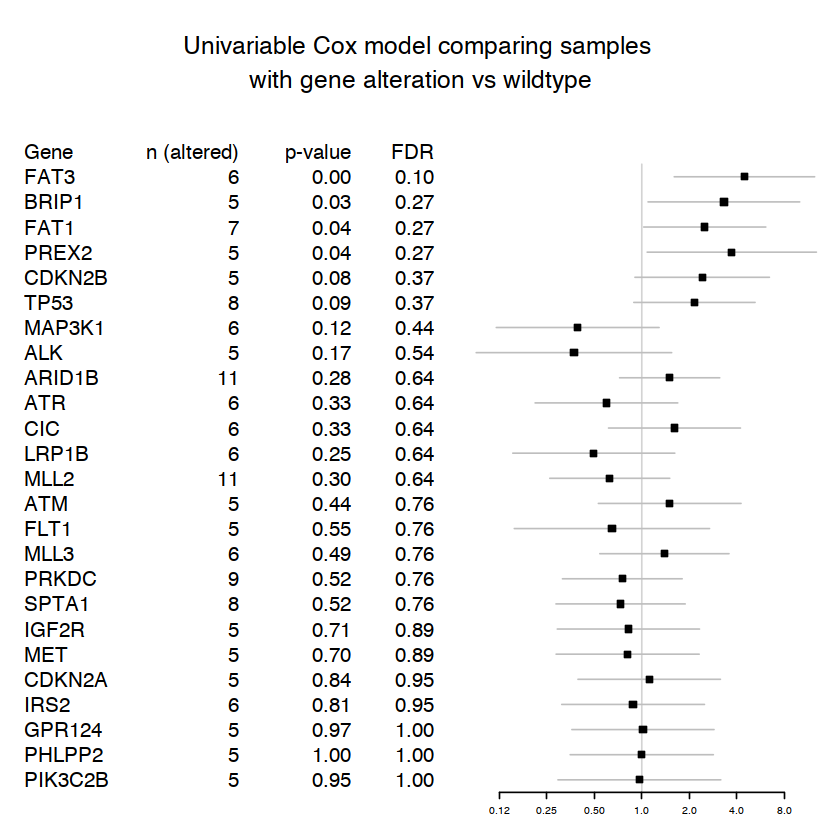

In [99]:
fplot <- forestplot(mytabletext, myhrs, boxsize = 0.25,
                    new_page = TRUE, xlog = TRUE,
                    title = "Univariable Cox model comparing samples \nwith gene alteration vs wildtype",)

In [100]:
pdf(file = paste0(plotpath,"Univar_forestplot_f1.pdf"),
    width = 7, height = 15,
    useDingbats = FALSE, onefile = F)

fplot <- forestplot(mytabletext, myhrs,boxsize = 0.25,
                    new_page = TRUE, xlog = TRUE,
                    title = "Univariable Cox model comparing samples \nwith gene alteration vs wildtype",)

dev.off()

pdf 
  2